## Question 1

In [ ]:
def countOccurance(mainArray, subArray):
  # Define the window size
  w = len(subArray)
  # Number of occurance
  count = 0
  
  # sliding window across the main array
  for i in range(len(mainArray)-len(subArray)+1):
    # Take elements from mainArray
    search = []
    for j in range(w):
      search.append(mainArray[i+j])
    # check if two array is equal
    if isPattern(search, subArray):
      count += 1    
  return count

In [ ]:
def isPattern(search, subArray):
    isValid=0
    if len(search) != len(subArray):
      return False
    for i in range (len(subArray)):
      if search[i]==subArray[i]:
        isValid += 1
    if isValid==len(subArray):
      return True
    return False

In [ ]:
A = [1,2,30,5,3,5, 70, 9, 1, 2, 30, 44, 25,56,56, 6, 1, 2, 30, 50, 43, 654, 1,2,30]
B = [1, 2, 30]

print("1-b) Occurance of array B in array A is " + str(countOccurance(A, B)))

b) Occurance of array B in array A is 4


In [ ]:
import numpy as np

# Convert int array to string
def listToString(s):
    # mapping int to string
    s=map(str, s)
    # return string 
    return (', '.join(s))

# convert B to string
arr_B = listToString(B)
  
# Counting sequence
output = repr(A).count(arr_B)
  
# view output
print("1-c) Occurance of array B in array A is " + str(output))

c) Occurance of array B in array A is 4


## Question 2

In [ ]:
# 2-a)  if we want to use only one function from that library we can import only targeted function. 
#     We need to define variable X
from math import ceil
x=4.3
x = ceil(x)

In [ ]:
# 2-b)  we can directly send each item to function.
#     we need to define function
def process_fruit(item):
  print(item)
list_of_fruits = ["apple", "pear", "orange"]
for i in range(len(list_of_fruits)):
  process_fruit(list_of_fruits[i])

In [ ]:
# 2-c) an object takes two variable to initiate ("height" and "weight"). Can give area with area() function 
class Rectangle:
  def __init__(self, height, width):
    self.height = height
    self.width = width
  def area(self):
    return self.height * self.width

## Question 3

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

img_rows, img_cols = 5, 5
input_shape = (img_rows, img_cols, 1)

cnn = Sequential([
    Conv2D(2, kernel_size=(2,2), activation='relu',padding='same',input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(2, kernel_size=(2,2), activation='relu',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='softmax')
])

cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam_v2.Adam(),
              metrics=['accuracy'])


In [38]:
cnn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 5, 5, 2)           10        
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 2, 2, 2)          0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 2, 2, 2)           18        
                                                                 
 average_pooling2d_20 (Avera  (None, 1, 1, 2)          0         
 gePooling2D)                                                    
                                                                 
 flatten_15 (Flatten)        (None, 2)                 0         
                                                                 
 dense_34 (Dense)            (None, 10)              

## Question 4

I am using "Annotated Corpus for Named Entity Recognition" from "https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus" as it has most upvote.

This dataset is extracted from GMB(Groningen Meaning Bank) corpus which is tagged, annotated and built specifically to train the classifier to predict named entities such as name, location, etc.
All the entities are labeled using the BIO scheme, where each entity label is prefixed with either B or I letter. B- denotes the beginning and I- inside of an entity. The words which are not of interest are labeled with 0 – tag.

Below table shows the detailed information about labels of the words.

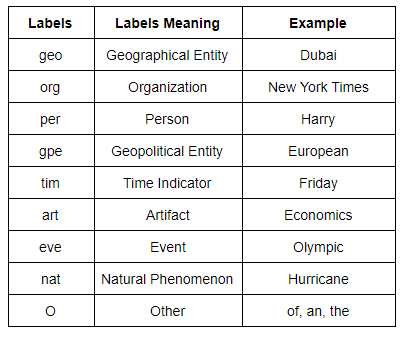

In [15]:
import pandas as pd

!pip install sklearn-crfsuite
!pip install scikit-learn==0.22.2 --user
!pip install git+https://github.com/SethPoulsen/sklearn-crfsuite.git@add-missing-attributes#egg=sklearn_crfsuite
from sklearn.model_selection import train_test_split
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_f1_score
from sklearn_crfsuite.metrics import flat_classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SethPoulsen/sklearn-crfsuite.git (to revision add-missing-attributes) to /tmp/pip-install-tr7n8ljq/sklearn-crfsuite_24f207177eae438486a59bcb68a8ce9d
  Running command git clone -q https://github.com/SethPoulsen/sklearn-crfsuite.git /tmp/pip-install-tr7n8ljq/sklearn-crfsuite_24f207177eae438486a59bcb68a8ce9d
  Running command git checkout -b add-missing-attributes --track origin/add-missing-attributes
  Switched to a new branch 'add-missing-attributes'
  Branch 'add-missing-attributes' set up to track remote branch 'add-missing-attributes' from 'origin'.


In [2]:
#Reading the csv file
df = pd.read_csv('ner_dataset.csv', encoding = "ISO-8859-1")

In [3]:
#Display first 10 rows
df.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [4]:
#Displaying the unique Tags
df['Tag'].unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [5]:
#Checking null values, if any.
df.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [6]:
#  use pandas fillna technique and 'ffill' method which propagates last valid observation forward to next.
df = df.fillna(method = 'ffill')

In [7]:
# Get the sentence which is list of tuples with its tag and pos.
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

In [8]:
#Displaying one full sentence
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[0]

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [9]:
#sentence with its pos and tag.
sent = getter.get_text()
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [10]:
sentences = getter.sentences

In [11]:
# default features used by the NER in nltk.
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [12]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
crf = CRF(algorithm = 'lbfgs',
         c1 = 0.1,
         c2 = 0.1,
         max_iterations = 100,
         all_possible_transitions = False)
crf.fit(X_train, y_train)

AttributeError: ignored

AttributeError: ignored

In [66]:
#Predicting on the test set.
y_pred = crf.predict(X_test)

In [67]:
# using precision, recall and f1-score metrics to evaluate the performance of the 
# model since the accuracy is not a good metric for this dataset due to unequal number of data points in each class.
f1_score = flat_f1_score(y_test, y_pred, average = 'weighted')
print(f1_score)

0.9715742090591318


In [ ]:
# report for CRF
report = flat_classification_report(y_test, y_pred)
print(report)